# Logistic regression
vehicle default loan prediction

In [69]:
# logistic regression 
#basic packages for data operations
import pandas as pd  # for dataframes operation
import numpy as np    # for linear algebra
import matplotlib.pyplot as plt  # for plottinf graphs
%matplotlib inline
import seaborn as sns  # data visualizations
import datetime  # date and time 
import re       

In [70]:
logic_train=pd.read_csv("C:/Users/DELL/Desktop/DataSets/loantrain.csv")
logic_test=pd.read_csv("C:/Users/DELL/Desktop/DataSets/loantest.csv")


In [71]:
logic_train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [72]:
logic_test.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-1974,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-1985,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-1995,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-1973,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-1972,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [73]:
#logic_train.info()

In [74]:
logic_train.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

In [75]:
logic_train.shape

(233154, 41)

In [76]:
logic_train.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [77]:
logic_train.corr()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848
DISBURSED_AMOUNT,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,...,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
ASSET_COST,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,...,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
LTV,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
BRANCH_ID,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
SUPPLIER_ID,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
MANUFACTURER_ID,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039
CURRENT_PINCODE_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
STATE_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075
EMPLOYEE_CODE_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,-0.006537,-0.003543,-0.002259,-0.002224,0.013470,0.001894,0.005473,0.003624,-0.002108,0.020657


In [78]:
logic_train.isnull().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

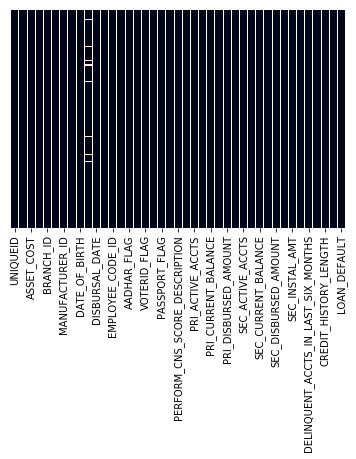

In [79]:
sns.heatmap(logic_train.isnull(),yticklabels=False,cbar=False)

In [80]:
logic_train['EMPLOYMENT_TYPE'].value_counts()

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64

In [81]:
logic_train['EMPLOYMENT_TYPE'].isnull().sum()

7661

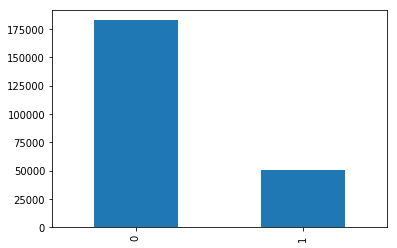

In [82]:
target=logic_train['LOAN_DEFAULT']
target.value_counts().plot.bar()

In [83]:
logic_train['DATE_OF_BIRTH'] = pd.to_datetime(logic_train['DATE_OF_BIRTH'])
logic_train['DISBURSAL_DATE'] = pd.to_datetime(logic_train['DISBURSAL_DATE'])
logic_train['EMPLOYMENT_TYPE'] = logic_train['EMPLOYMENT_TYPE'].astype('category')
logic_train['PERFORM_CNS_SCORE_DESCRIPTION'] = logic_train['PERFORM_CNS_SCORE_DESCRIPTION'].astype('category')

In [84]:
#missing values handling
logic_train['EMPLOYMENT_TYPE']=logic_train['EMPLOYMENT_TYPE'].fillna(method='bfill')

In [85]:
logic_train.isnull().sum().sum()

0

In [86]:
#logic_train.info()

In [87]:
#dropping Id columns
logic_train=logic_train.drop(['BRANCH_ID','CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID','SUPPLIER_ID'],axis=1)

In [88]:
#replacing values
logic_train =logic_train.replace({'PERFORM_CNS_SCORE_DESCRIPTION':{'C-Very Low Risk':'Low', 'A-Very Low Risk':'Low',
                                                       'B-Very Low Risk':'Low', 'D-Very Low Risk':'Low',
                                                       'F-Low Risk':'Low', 'E-Low Risk':'Low', 'G-Low Risk':'Low',
                                                       'H-Medium Risk': 'Medium', 'I-Medium Risk': 'Medium',
                                                       'J-High Risk':'High', 'K-High Risk':'High','L-Very High Risk':'Very High',
                                                       'M-Very High Risk':'Very High','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                       'Not Scored: Only a Guarantor':'Not Scored','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                                        'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                                       'Not Scored: Sufficient History Not Available':'Not Scored', 'No Bureau History Available':'Not Scored'
                                                       }})

In [89]:
logic_train['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

Not Scored    129785
Low            69022
Medium         12412
High           12025
Very High       9910
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

In [90]:
logic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 37 columns):
UNIQUEID                               233154 non-null int64
DISBURSED_AMOUNT                       233154 non-null int64
ASSET_COST                             233154 non-null int64
LTV                                    233154 non-null float64
MANUFACTURER_ID                        233154 non-null int64
DATE_OF_BIRTH                          233154 non-null datetime64[ns]
EMPLOYMENT_TYPE                        233154 non-null category
DISBURSAL_DATE                         233154 non-null datetime64[ns]
STATE_ID                               233154 non-null int64
MOBILENO_AVL_FLAG                      233154 non-null int64
AADHAR_FLAG                            233154 non-null int64
PAN_FLAG                               233154 non-null int64
VOTERID_FLAG                           233154 non-null int64
DRIVING_FLAG                           233154 non-null int64
PASSPORT_FLA

In [91]:
logic_train['AVERAGE_ACCT_AGE']=logic_train['AVERAGE_ACCT_AGE'].map(lambda x : re.sub("[^0-9]+"," ",x))
logic_train['AVERAGE_ACCT_AGE']=logic_train['AVERAGE_ACCT_AGE'].str.split(" ",expand=True)[0].astype(int)*12+logic_train['AVERAGE_ACCT_AGE'].str.split(" ",expand=True)[1].astype(int)

logic_train['CREDIT_HISTORY_LENGTH']=logic_train['CREDIT_HISTORY_LENGTH'].map(lambda x : re.sub("[^0-9]+"," ",x))
logic_train['CREDIT_HISTORY_LENGTH']=logic_train['CREDIT_HISTORY_LENGTH'].str.split(" ",expand=True)[0].astype(int)*12+logic_train['CREDIT_HISTORY_LENGTH'].str.split(" ",expand=True)[1].astype(int)

In [92]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
logic_train['EMPLOYMENT_TYPE']=label.fit_transform(logic_train['EMPLOYMENT_TYPE'])
logic_train['PERFORM_CNS_SCORE_DESCRIPTION']=label.fit_transform(logic_train['PERFORM_CNS_SCORE_DESCRIPTION'])

In [93]:
logic_train.shape

(233154, 37)

In [94]:
logic_train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,MOBILENO_AVL_FLAG,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,45,1984-01-01,0,2018-03-08,6,1,...,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,45,1985-07-31,1,2018-09-26,6,1,...,0,0,1991,0,0,1,23,23,0,1
2,417566,53278,61360,89.63,45,1985-08-24,1,2018-01-08,6,1,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,45,1993-12-30,1,2018-10-26,6,1,...,0,0,31,0,0,0,8,15,1,1
4,539055,52378,60300,88.39,45,1977-09-12,1,2018-09-26,6,1,...,0,0,0,0,0,0,0,0,1,1


In [95]:
# logic_train=logic_train.drop(columns=['DATE_OF_BIRTH','DISBURSAL_DATE'],axis=1)
# logic_train.head()
logic_train=logic_train.drop(columns=['DATE_OF_BIRTH','DISBURSAL_DATE'],axis=1)
logic_train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,45,0,6,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,45,1,6,1,1,0,...,0,0,1991,0,0,1,23,23,0,1
2,417566,53278,61360,89.63,45,1,6,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,45,1,6,1,1,0,...,0,0,31,0,0,0,8,15,1,1
4,539055,52378,60300,88.39,45,1,6,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [96]:
# splitting and modeling
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
train_X=logic_train.drop(columns=['LOAN_DEFAULT','UNIQUEID'],axis=1)
train_Y=logic_train['LOAN_DEFAULT']

In [98]:
train_X.shape,train_Y.shape

((233154, 33), (233154,))

In [99]:
x_train,x_test,y_train,y_test=train_test_split(train_X,train_Y,test_size=0.40,random_state=41)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((139892, 33), (93262, 33), (139892,), (93262,))

In [100]:
logic_class=LogisticRegression()
logic_class.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
logic_pred=logic_class.predict(x_test)
logic_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
# test_predict=logic_class.predict(logic_test)

In [103]:
print("classification report:",classification_report(y_test,logic_pred))
print("confusion matrix:",confusion_matrix(y_test,logic_pred))
print("Accuracy:",accuracy_score(y_test,logic_pred))
print("f1 score:",f1_score(y_test,logic_pred))

classification report:               precision    recall  f1-score   support

           0       0.78      1.00      0.88     73177
           1       0.00      0.00      0.00     20085

   micro avg       0.78      0.78      0.78     93262
   macro avg       0.39      0.50      0.44     93262
weighted avg       0.62      0.78      0.69     93262

confusion matrix: [[73168     9]
 [20085     0]]
Accuracy: 0.7845424717462632
f1 score: 0.0


# Decision Tree
Diabetes prediction

In [104]:
#installing packages for data operation
import pandas as pd  # for data frame operation
import numpy as np  # for linear algebra
import matplotlib.pyplot as plt  # for plotting a graphs
%matplotlib inline
import seaborn as sns  # for data visualizations

In [105]:
decision=pd.read_csv("C:/Users/DELL/Desktop/DataSets/diabetes.csv")
decision.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
decision.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [107]:
decision.shape

(768, 9)

In [108]:
decision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [109]:
decision.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


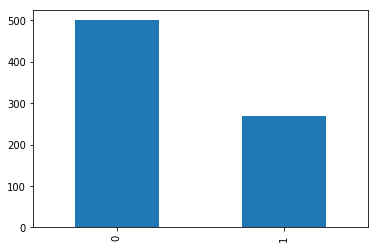

In [110]:
target=decision['Outcome']
target.value_counts().plot.bar()

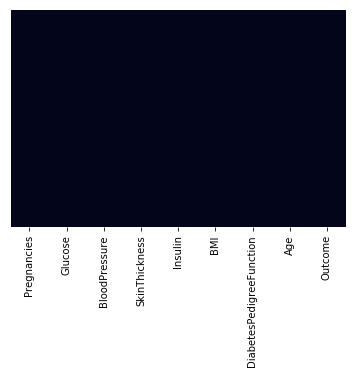

In [111]:
sns.heatmap(decision.isnull(),yticklabels=False,cbar=False)

In [112]:
decision.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [113]:
decision.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


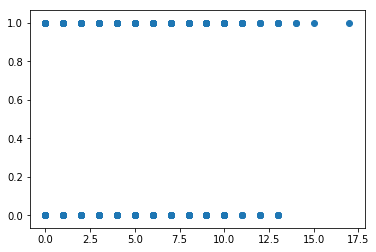

In [114]:
plt.scatter(decision['Pregnancies'],decision['Outcome'])

In [115]:
#splitting of data
decision_x=decision.drop(columns=['Outcome'],axis=1)
decision_y=decision['Outcome']

In [116]:
decision_x.shape,decision_y.shape

((768, 8), (768,))

In [117]:
# importing packages for modeling and report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix

In [118]:
d_train,d_test,t_train,t_test=train_test_split(decision_x,decision_y,test_size=0.20,random_state=0)
d_train.shape,d_test.shape,t_train.shape,t_test.shape

((614, 8), (154, 8), (614,), (154,))

In [119]:
decision_class=DecisionTreeClassifier()
decision_class.fit(d_train,t_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
decision_predict=decision_class.predict(d_test)
decision_predict

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [121]:
print("classification report:",classification_report(t_test,decision_predict))
print("confusion_matrix:",confusion_matrix(t_test,decision_predict))
print("Accuracy:",accuracy_score(t_test,decision_predict))
print("f1 score:",f1_score(t_test,decision_predict))

classification report:               precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.63      0.66      0.65        47

   micro avg       0.78      0.78      0.78       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.78      0.78       154

confusion_matrix: [[89 18]
 [16 31]]
Accuracy: 0.7792207792207793
f1 score: 0.6458333333333333


# Linear Regression
House saleprice prediction

In [122]:
#installing packages for data operation
import pandas as pd  # for data frame  operation
import numpy as np  # for array and linear algebra
import matplotlib.pyplot as plt  # for plottinf graphs
%matplotlib inline
import seaborn as sns # for data visualizations

In [123]:
boston=pd.read_csv("C:/Users/DELL/Desktop/DataSets/boston_data.csv")
boston_test=pd.read_csv("C:/Users/DELL/Desktop/DataSets/boston_test_data.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [124]:
boston_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
1,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
2,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
3,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
4,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [125]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [126]:
boston.shape,boston_test.shape

((404, 14), (102, 13))

In [127]:
# dropping column chas because it is a categorical value or discrete
boston=boston.drop(columns=['chas'],axis=1)
boston_test=boston_test.drop(columns=['chas'],axis=1)

In [128]:
boston.shape,boston_test.shape

((404, 13), (102, 12))

In [129]:
boston.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [130]:
boston.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


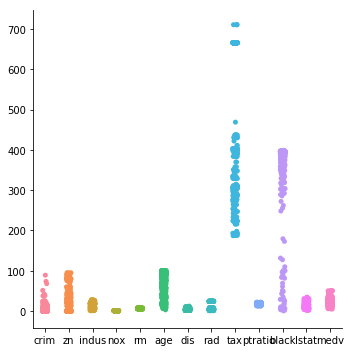

In [131]:
sns.catplot(data=boston)

Text(0.5, 1.0, 'crim and medv')

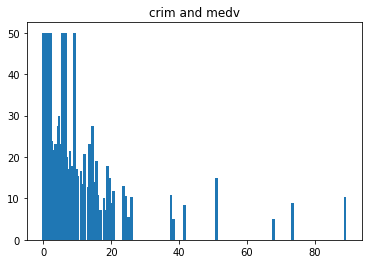

In [132]:
plt.bar(boston['crim'],boston['medv'])
plt.title("crim and medv")

<Figure size 3600x3600 with 0 Axes>

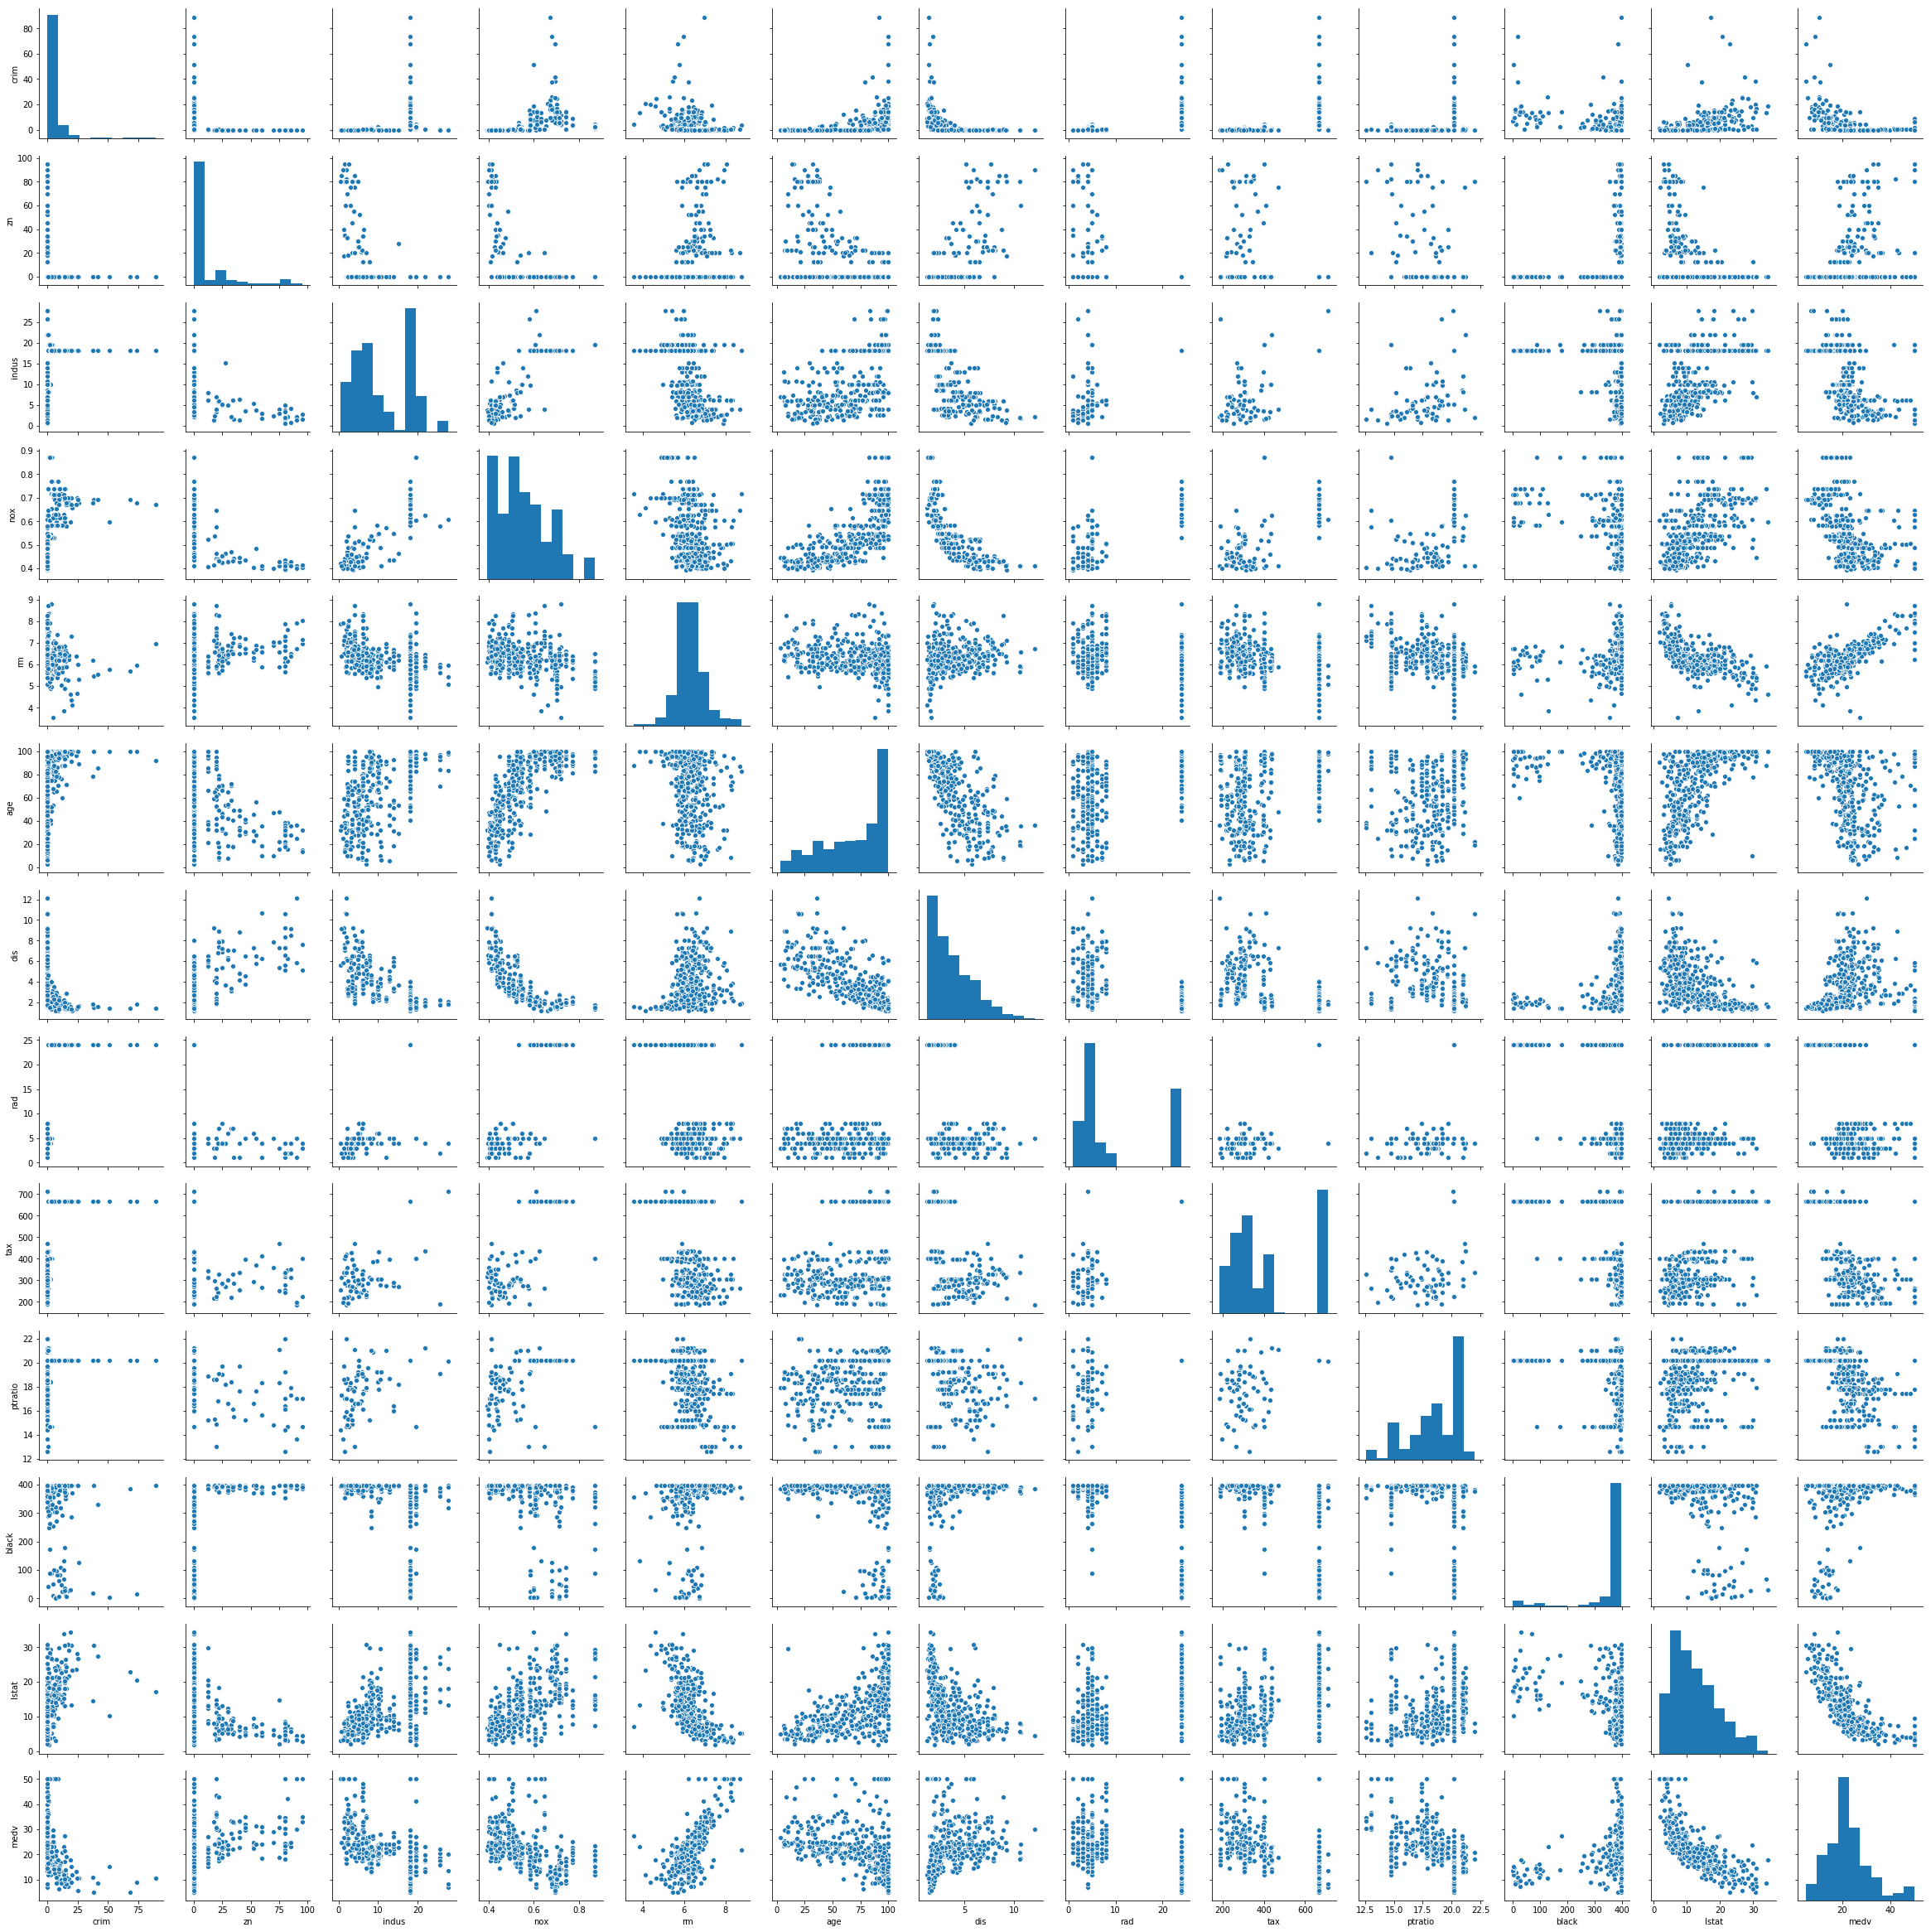

In [133]:
plt.figure(figsize=(50,50))
sns.pairplot(boston)

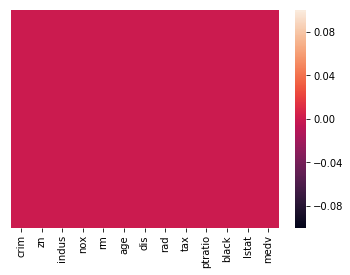

In [134]:
#heatmep for null values detection
sns.heatmap(boston.isnull(),yticklabels=False)

In [135]:
#checking for null values
boston.isnull().sum()

crim       0
zn         0
indus      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [136]:
# dividing data 
boston_x=boston[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
boston_y=boston[['medv']]

In [137]:
boston_x.shape,boston_y.shape

((404, 12), (404, 1))

In [138]:
# importing modeling packages model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score

In [139]:
#splitting data
b_train,b_test,o_train,o_test=train_test_split(boston_x,boston_y,test_size=0.251,random_state=1)
b_train.shape,b_test.shape,o_train.shape,o_test.shape

((302, 12), (102, 12), (302, 1), (102, 1))

In [140]:
boston_test.shape

(102, 12)

In [141]:
boston_regressor=LinearRegression()
boston_regressor.fit(b_train,o_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
boston_predict=boston_regressor.predict(b_test)
#boston_predict
boston_predict.shape

(102, 1)

In [143]:
train_predict=boston_regressor.predict(b_train)
train_predict.shape

(302, 1)

In [144]:
test_predict=boston_regressor.predict(boston_test)
#test_predict
test_predict.shape

(102, 1)

In [145]:
# mean squared error
print("mean squared error is:",mean_squared_error(o_test,boston_predict))
#print("Accuracy:",accuracy_score(o_test,boston_predict))

mean squared error is: 18.45889920603765


In [ ]:
#plt.scatter(b_train,o_train,color="red")
#plt.plot(b_train,train_predict,color="green")

# support Vector Machine
credit card default prediction

In [44]:
# importing packages
import pandas as pd # for data frame  operation
import numpy as np # for arry and linear algebra
import matplotlib.pyplot as plt #plotting graphs
%matplotlib inline              
import seaborn as sns # for data visualization

In [45]:
support=pd.read_csv("C:/Users/DELL/Desktop/DataSets/creditcard.csv")
support.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
support.shape

(284807, 31)

In [47]:
support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [48]:
support.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [49]:
support.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


In [50]:
support.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0, 0.5, 'values')

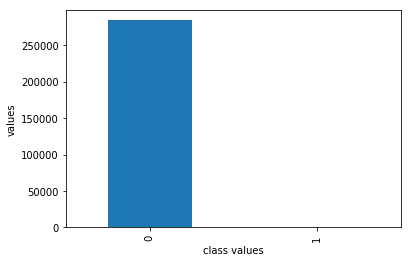

In [51]:
target=support['Class']
target.value_counts().plot.bar()
plt.xlabel("class values")
plt.ylabel("values")

In [52]:
support.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
support.isnull().sum().sum()

0

In [11]:
# dividing data
support_x=support.drop(columns=['Class','Time'],axis=1)
support_y=support['Class']

In [12]:
support_x.shape,support_y.shape

((284807, 29), (284807,))

In [22]:
# import ing models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix, roc_auc_score
#from sklearn.svm import SVC
from sklearn import svm

In [23]:
s_train,s_test,u_train,u_test=train_test_split(support_x,support_y,test_size=0.30,random_state=1)
s_train.shape,s_test.shape,u_train.shape,u_test.shape

((199364, 29), (85443, 29), (199364,), (85443,))

In [24]:
#assining support
#svm_class=SVC(kernel='linear')
support=svm.LinearSVC(random_state=20)

In [25]:
# fitting svm with linear kernal
#svm_class.fit(s_train,u_train)
support.fit(s_train,u_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
     verbose=0)

In [26]:
support_predict=support.predict(s_test)
support_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
print("classification report:",classification_report(u_test,support_predict))
print("confusion matrix:",confusion_matrix(u_test,support_predict))
print("Accuracy:",accuracy_score(u_test,support_predict))
print("f1 score:",f1_score(u_test,support_predict))
print("roc score:",roc_auc_score(u_test,support_predict))

classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.31      0.73      0.43       135

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.65      0.86      0.72     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix: [[85089   219]
 [   37    98]]
Accuracy: 0.9970038505202299
f1 score: 0.43362831858407086
roc score: 0.8616793787739068


In [ ]:
# import numpy as np
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
# from sklearn.svm import SVC
# clf = SVC(gamma='auto')
# clf.fit(X, y)
# SVC(gamma='auto')
# print(clf.predict([[-0.8, -1]]))

# K means 
wholesale customerr data

In [29]:
# importing packages
import pandas as pd # for dataframe operations
import numpy as np # for linear algebra
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  # for data visualization

In [30]:
kmeans=pd.read_csv("C:/Users/DELL/Desktop/DataSets/Wholesale customers data.csv")
kmeans.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [31]:
kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [32]:
kmeans.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [33]:
kmeans.shape

(440, 8)

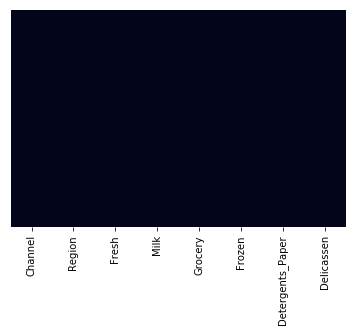

In [34]:
sns.heatmap(kmeans.isnull(),yticklabels=False,cbar=False)

In [35]:
kmeans.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [36]:
kmeans.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [37]:
kmeans.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [38]:
# modeling packages
from sklearn.cluster import KMeans


In [39]:
kmeans_fit=KMeans(n_clusters=3)
kmeans_fit.fit(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
kmeans_predict=kmeans_fit.predict(kmeans)
kmeans_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

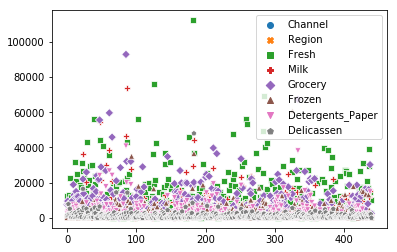

In [41]:
sns.scatterplot(data=kmeans)

Text(0, 0.5, 'values')

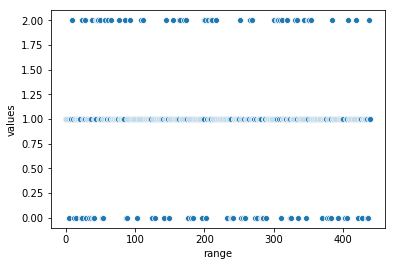

In [42]:
sns.scatterplot(data=kmeans_predict)
plt.xlabel("range")
plt.ylabel("values")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
K=pd.read_csv("C:/Users/DELL/Desktop/DataSets/diabetes.csv")
K.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
K.shape

(768, 9)

In [7]:
K.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
K.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# K Nearest Neighbor
adult income rate prediction

In [175]:
# importing packages
import pandas as pd  # for dataframe
import numpy as np   # for linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   # for data visualization

In [176]:
knn=pd.read_csv("C:/Users/DELL/Desktop/DataSets/adult.csv")
knn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [177]:
knn.shape

(48842, 15)

In [178]:
knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [179]:
knn.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [180]:
# handling categorical values
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
knn['workclass']=label.fit_transform(knn['workclass'])
knn['education']=label.fit_transform(knn['education'])
knn['marital-status']=label.fit_transform(knn['marital-status'])
knn['occupation']=label.fit_transform(knn['occupation'])
knn['relationship']=label.fit_transform(knn['relationship'])
knn['race']=label.fit_transform(knn['race'])
knn['gender']=label.fit_transform(knn['gender'])
knn['native-country']=label.fit_transform(knn['native-country'])
knn['native-country']=label.fit_transform(knn['native-country'])
knn['income']=label.fit_transform(knn['income'])

In [181]:
knn.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [182]:
# dividing a data
knn_x=knn[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
knn_y=knn[['income']]

In [183]:
knn_x.shape,knn_y.shape

((48842, 14), (48842, 1))

In [184]:
# import modeling packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [185]:
# splitting data
k_train,k_test,n_train,n_test=train_test_split(knn_x,knn_y,test_size=0.35,random_state=1)
k_train.shape,k_test.shape,n_train.shape,n_test.shape

((31747, 14), (17095, 14), (31747, 1), (17095, 1))

In [186]:
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(k_train,n_train)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [187]:
knn_predict=knn_classifier.predict(k_test)
knn_predict

array([0, 0, 0, ..., 0, 0, 0])

In [188]:
print("classification report:",classification_report(n_test,knn_predict))
print("confusion_matrix:",confusion_matrix(n_test,knn_predict))
print("accuracy score:",accuracy_score(n_test,knn_predict))
print("f1 score:",f1_score(n_test,knn_predict))
print("roc value:",roc_auc_score(n_test,knn_predict))

classification report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85     12974
           1       0.51      0.38      0.43      4121

   micro avg       0.76      0.76      0.76     17095
   macro avg       0.66      0.63      0.64     17095
weighted avg       0.74      0.76      0.75     17095

confusion_matrix: [[11443  1531]
 [ 2551  1570]]
accuracy score: 0.7612167300380228
f1 score: 0.43478260869565216
roc value: 0.6314851250669259


# Principal component of Analysis
PCA on breast cancer data

In [1]:
#basic packages for operation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# here i am using built in dataset of breast cancer
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [3]:
#creating dataframe
cancer_data= pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
cancer_data.shape

(569, 30)

In [6]:
cancer_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [7]:
cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
cancer_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [9]:
# applying standard scaler
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()

In [10]:
cancer_data=standard.fit_transform(cancer_data)
cancer_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [11]:
# scaled_data=standard.transform(cancer_data)
# scaled_data

In [21]:
# applying principle components of analysis
from sklearn.decomposition import PCA
pca_data=PCA(n_components=2)

In [22]:
cancer_data=pca_data.fit_transform(cancer_data)
cancer_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [23]:
cancer_data.shape

(569, 2)

In [24]:
explained_variance=pca_data.explained_variance_ratio_
explained_variance

array([0.70002815, 0.29997185])

Text(0, 0.5, 'second principle component of analysis')

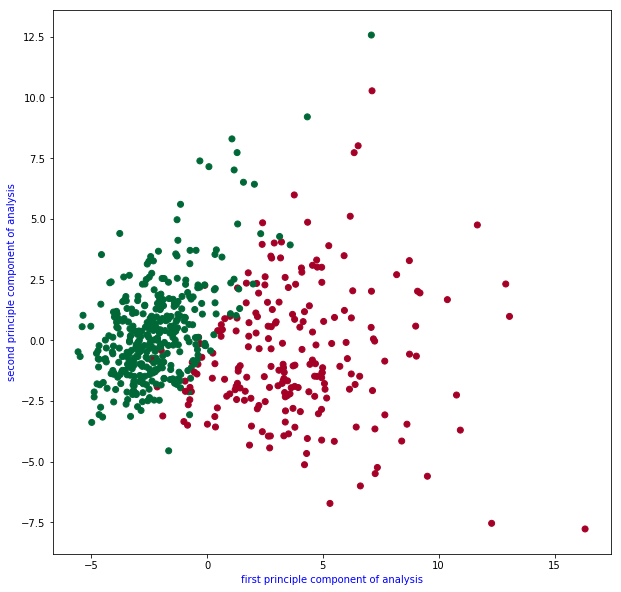

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(cancer_data[:,0],cancer_data[:,1],c=cancer['target'],cmap='RdYlGn')
plt.xlabel("first principle component of analysis",color='blue')
plt.ylabel("second principle component of analysis",color='blue')

# Linear Regression
House saleprice prediction

In [2]:
#importing necessary packages
import pandas as pd  #for dataframes operations
import numpy as np  # for linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns    # for data visualization

In [4]:
linear=pd.read_csv("C:/Users/DELL/Desktop/DataSets/hometrain.csv")
linear.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
linear.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
linear.shape

(1460, 81)

In [8]:
linear.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
linear['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

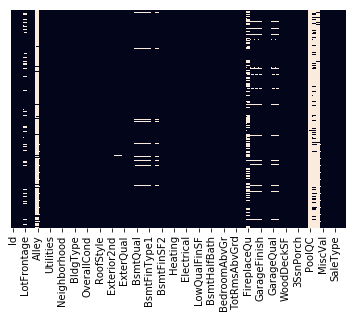

In [11]:
# checking null values
sns.heatmap(linear.isnull(),yticklabels=False,cbar=False)

In [12]:
linear.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [14]:
#filling missing values
linear['LotFrontage'].isnull().sum()
linear['LotFrontage']=linear['LotFrontage'].fillna(linear['LotFrontage'].mean())

In [15]:
# dropping columns
linear.drop(['Alley'],axis=1,inplace=True)

In [16]:
linear['BsmtCond']=linear['BsmtCond'].fillna(linear['BsmtCond'].mode()[0])
linear['BsmtQual']=linear['BsmtQual'].fillna(linear['BsmtQual'].mode()[0])

In [17]:
linear['FireplaceQu']=linear['FireplaceQu'].fillna(linear['FireplaceQu'].mode()[0])
linear['GarageType']=linear['GarageType'].fillna(linear['GarageType'].mode()[0])

In [18]:
linear.drop(['GarageYrBlt'],axis=1,inplace=True)

In [19]:
linear['GarageFinish']=linear['GarageFinish'].fillna(linear['GarageFinish'].mode()[0])
linear['GarageQual']=linear['GarageQual'].fillna(linear['GarageQual'].mode()[0])
linear['GarageCond']=linear['GarageCond'].fillna(linear['GarageCond'].mode()[0])

In [20]:
linear.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [21]:
linear.shape

(1460, 76)

In [26]:
#linear.drop(['Id'],axis=1,inplace=True)

In [27]:
linear['MasVnrType']=linear['MasVnrType'].fillna(linear['MasVnrType'].mode()[0])
linear['MasVnrArea']=linear['MasVnrArea'].fillna(linear['MasVnrArea'].mode()[0])

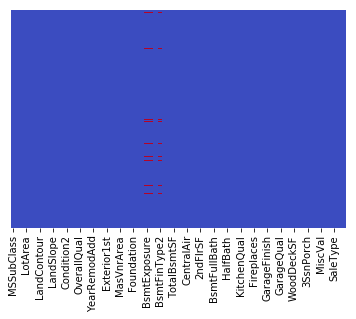

In [28]:
sns.heatmap(linear.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [29]:
linear['BsmtExposure']=linear['BsmtExposure'].fillna(linear['BsmtExposure'].mode()[0])
linear['BsmtFinType2']=linear['BsmtFinType2'].fillna(linear['BsmtFinType2'].mode()[0])

In [30]:
linear.dropna(inplace=True)

In [31]:
linear.shape

(1422, 75)

In [33]:
linear.isnull().sum().sum()

0

In [34]:
linear.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [68]:
#linear.info()

In [36]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [55]:
linear['MSZoning']=label.fit_transform(linear['MSZoning'])
linear['Street']=label.fit_transform(linear['Street'])
linear['LotShape']=label.fit_transform(linear['LotShape'])
linear['LandContour']=label.fit_transform(linear['LandContour'])
linear['Utilities']=label.fit_transform(linear['Utilities'])
linear['LotConfig']=label.fit_transform(linear['LotConfig'])
linear['LandSlope']=label.fit_transform(linear['LandSlope'])
linear['Neighborhood']=label.fit_transform(linear['Neighborhood'])
linear['Condition1']=label.fit_transform(linear['Condition1'])
linear['Condition2']=label.fit_transform(linear['Condition2'])
linear['BldgType']=label.fit_transform(linear['BldgType'])
linear['HouseStyle']=label.fit_transform(linear['HouseStyle'])
linear['RoofStyle']=label.fit_transform(linear['RoofStyle'])
linear['RoofMatl']=label.fit_transform(linear['RoofMatl'])
linear['Exterior1st']=label.fit_transform(linear['Exterior1st'])
linear['Exterior2nd']=label.fit_transform(linear['Exterior2nd'])
linear['MasVnrType']=label.fit_transform(linear['MasVnrType'])
linear['ExterQual']=label.fit_transform(linear['ExterQual'])
linear['ExterCond']=label.fit_transform(linear['ExterCond'])
linear['Foundation']=label.fit_transform(linear['Foundation'])
linear['BsmtQual']=label.fit_transform(linear['BsmtQual'])
linear['BsmtCond']=label.fit_transform(linear['BsmtCond'])
linear['BsmtExposure']=label.fit_transform(linear['BsmtExposure'])
linear['BsmtFinType1']=label.fit_transform(linear['BsmtFinType1'])
linear['BsmtFinType2']=label.fit_transform(linear['BsmtFinType2'])
linear['Heating']=label.fit_transform(linear['Heating'])
linear['HeatingQC']=label.fit_transform(linear['HeatingQC'])
linear['Electrical']=label.fit_transform(linear['Electrical'])
linear['CentralAir']=label.fit_transform(linear['CentralAir'])
linear['KitchenQual']=label.fit_transform(linear['KitchenQual'])
linear['FireplaceQu']=label.fit_transform(linear['FireplaceQu'])
linear['GarageType']=label.fit_transform(linear['GarageType'])
linear['GarageFinish']=label.fit_transform(linear['GarageFinish'])
linear['GarageQual']=label.fit_transform(linear['GarageQual'])
linear['GarageCond']=label.fit_transform(linear['GarageCond'])
linear['PavedDrive']=label.fit_transform(linear['PavedDrive'])
linear['SaleType']=label.fit_transform(linear['SaleType'])
linear['SaleCondition']=label.fit_transform(linear['SaleCondition'])
linear['Functional']=label.fit_transform(linear['Functional'])

In [56]:
linear.dtypes.value_counts()

int64      72
float64     2
int32       1
dtype: int64

In [57]:
linear.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [58]:
# splitting data
X=linear.drop(columns=['SalePrice'],axis=1)
Y=linear['SalePrice']

In [59]:
X.shape,Y.shape

((1422, 74), (1422,))

In [60]:
# importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=41)

In [62]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
linear_predict=linear_reg.predict(x_test)
linear_predict

array([254889.76052352,  62422.69870411, 184503.37256187, 144143.06302725,
       259998.44234037, 149139.25031399, 179023.67793478, 141956.41888928,
       216814.54123916, 178466.67684425, 300886.5292918 , 175041.84161456,
       124450.37172628, 127613.1664664 , 232846.26799249, 123457.53951411,
       138673.90194613, 184757.70118153, 878273.69873258, 154270.41397629,
       137909.75611987, 165361.54479651, 336600.64593192, 102205.96352914,
       238644.51438814, 217761.20331549, 288653.29568616, 255239.61820406,
       192807.12927647, 193284.45604609, 161321.68991868,  86246.23909234,
       120662.67246108,  84463.81056833, 358186.79990527, 184097.49298719,
       149065.1471198 , 168312.23688481, 123957.12037086, 192683.14511413,
       293323.50351999, 238407.67925653, 333655.33074381, 175270.21801002,
       159501.52854262, 184212.61485829, 134797.33609957, 234288.84610773,
       138008.84690296, 121623.39666361, 121243.87337673, 192041.40088591,
       141538.57460417, 1

In [67]:
print("Root mean square is:",mean_squared_error(y_test,linear_predict))

Root mean square is: 2052821499.0888872


In [33]:
# importing packages
import pandas as pd   # for data frames
import numpy as np  # for linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  # data visualization

In [34]:
Kmeans=pd.read_csv("C:/Users/DELL/Downloads/clustering.csv")
Kmeans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [35]:
Kmeans.shape

(381, 13)

In [36]:
Kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
Loan_ID              381 non-null object
Gender               376 non-null object
Married              381 non-null object
Dependents           373 non-null object
Education            381 non-null object
Self_Employed        360 non-null object
ApplicantIncome      381 non-null int64
CoapplicantIncome    381 non-null float64
LoanAmount           381 non-null float64
Loan_Amount_Term     370 non-null float64
Credit_History       351 non-null float64
Property_Area        381 non-null object
Loan_Status          381 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [37]:
Kmeans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [42]:
Kmeans.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
Kmeans['Gender']=Kmeans['Gender'].fillna(method='bfill')
Kmeans['Dependents']=Kmeans['Dependents'].fillna(method='ffill')
Kmeans['Self_Employed']=Kmeans['Self_Employed'].fillna(Kmeans['Self_Employed'].mode()[0])
Kmeans['Loan_Amount_Term']=Kmeans['Loan_Amount_Term'].fillna(method="bfill")
Kmeans['Credit_History']=Kmeans['Credit_History'].fillna(Kmeans['Credit_History'].mode()[0])

In [51]:
Kmeans.isnull().sum().sum()

0

In [52]:
Kmeans.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label=LabelEncoder()
Kmeans['Gender']=label.fit_transform(Kmeans['Gender'])
Kmeans['Married']=label.fit_transform(Kmeans['Married'])
Kmeans['Education']=label.fit_transform(Kmeans['Education'])
Kmeans['Dependents']=label.fit_transform(Kmeans['Dependents'])
Kmeans['Self_Employed']=label.fit_transform(Kmeans['Self_Employed'])
Kmeans['Property_Area']=label.fit_transform(Kmeans['Property_Area'])
Kmeans['Loan_Status']=label.fit_transform(Kmeans['Loan_Status'])

In [55]:
Kmeans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [57]:
Kmeans=Kmeans.drop(columns=['Loan_ID'],axis=1)

In [58]:
Kmeans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score,accuracy_score

In [60]:
K=KMeans(n_clusters=4)
K.fit(Kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
predict=K.predict(Kmeans)
predict

array([1, 1, 0, 3, 0, 1, 0, 0, 0, 3, 1, 1, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 3, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 3, 1, 3, 0, 3, 0, 1, 0, 1, 1, 0, 1, 1, 3, 1, 0,
       1, 0, 0, 0, 3, 3, 1, 1, 0, 0, 0, 3, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 3, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1,
       0, 0, 3, 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 1, 0, 3, 3, 3, 0, 3, 3, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0,
       1, 3, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       3, 1, 1, 1, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 3, 3, 1, 1, 3, 0, 3, 1,
       1, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 3, 1, 0, 3, 0, 1, 3, 1, 1, 3, 3, 0, 1, 0, 3, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 3, 1, 1, 1, 3, 3, 1, 3, 0, 0, 0,

In [64]:
#print("accuracy:",accuracy_score(Kmeans,predict))